<a href="https://colab.research.google.com/github/SambhavVinay/melanoma_v1/blob/main/melanoma_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os, zipfile, warnings

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [3]:
with zipfile.ZipFile("archive (19).zip", "r") as zip_ref:
    zip_ref.extractall(".")

base_dir = os.path.join("/content","archive (19).zip")
train_dir = "/content/melanoma_cancer_dataset/train"
test_dir = "/content/melanoma_cancer_dataset/test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
size = (150,150)
BATCH_SIZE = 32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=size,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=size,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/tmp/ipython-input-3289541729.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=class_counts, palette="pastel")


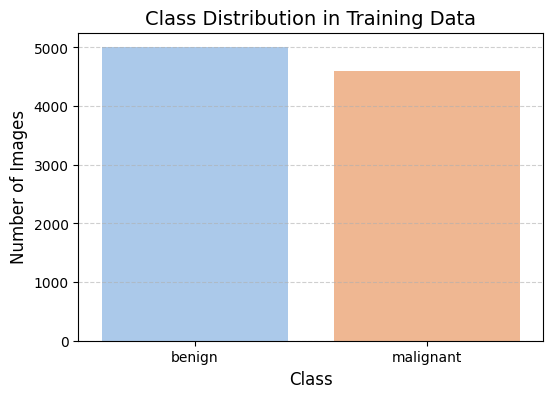

Benign images: 5000
Malignant images: 4605


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class_labels = list(train_generator.class_indices.keys())

class_counts = np.bincount(train_generator.classes)

plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=class_counts, palette="pastel")
plt.title("Class Distribution in Training Data", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print(f"Benign images: {class_counts[0]}")
print(f"Malignant images: {class_counts[1]}")


In [9]:
model = keras.Sequential([

        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),


        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),


        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),


        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "melanoma_best.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

train_steps = train_generator.samples // train_generator.batch_size
val_steps = val_generator.samples // val_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_steps,
    callbacks=[early_stop,checkpoint],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.6711 - loss: 0.6743
Epoch 1: val_accuracy improved from -inf to 0.83468, saving model to melanoma_best.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 224ms/step - accuracy: 0.6714 - loss: 0.6736 - val_accuracy: 0.8347 - val_loss: 0.4253
Epoch 2/15
  1/300 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9375 - loss: 0.2935

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.83468 to 0.84677, saving model to melanoma_best.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9375 - loss: 0.2935 - val_accuracy: 0.8468 - val_loss: 0.4154
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8563 - loss: 0.3399
Epoch 3: val_accuracy improved from 0.84677 to 0.89718, saving model to melanoma_best.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 60s 200ms/step - accuracy: 0.8563 - loss: 0.3398 - val_accuracy: 0.8972 - val_loss: 0.3149
Epoch 4/15
  1/300 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9375 - loss: 0.2210
Epoch 4: val_accuracy did not improve from 0.89718
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9375 - loss: 0.2210 - val_accuracy: 0.8891 - val_loss: 0.3134
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8662 - loss: 0.3183
Epoch 5: val_accuracy did not improve from 0.89718
300/300 ━━━━━━━━━━━━━━━━━━━━ 61s 202ms/step - accuracy: 0.8662 - loss: 0.3183 - val_accuracy: 0

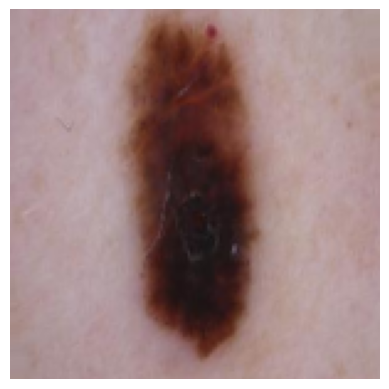

Label (numeric): 1.0
Label (class name): malignant


In [11]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_generator)

plt.imshow(images[0])
plt.axis("off")
plt.show()

print("Label (numeric):", labels[0])
print("Label (class name):", list(train_generator.class_indices.keys())[int(labels[0])])

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step


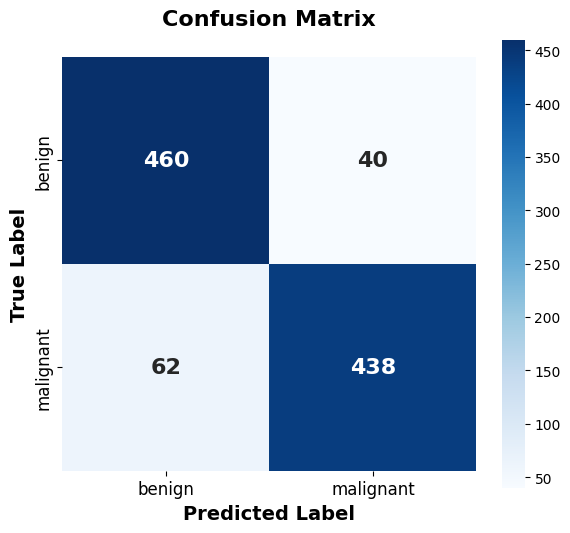


Performance Metrics:
Accuracy: 0.8980
Precision: 0.9163
Recall (Sensitivity): 0.8760
Specificity: 0.9200
F1-Score: 0.8957

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

      benign       0.88      0.92      0.90       500
   malignant       0.92      0.88      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000


Simple final model saved as 'simple_final_model.keras'


In [21]:
predictions = model.predict(val_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = val_generator.classes
cm = confusion_matrix(true_classes, predicted_classes)
class_names = list(val_generator.class_indices.keys())


plt.figure(figsize=(6, 6))


sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            annot_kws={'size': 16, 'weight': 'bold'},
            cbar_kws={'shrink': 0.8},
            square=True)

plt.title('Confusion Matrix\n', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

TN, FP, FN, TP = cm.ravel()




accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1_score:.4f}")


print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT")
print("="*50)
print(classification_report(true_classes, predicted_classes, target_names=class_names))


model.save('simple_final_model.keras')
print("\nSimple final model saved as 'simple_final_model.keras'")

Saving 46.jpg to 46.jpg
Saving 52.jpg to 52 (1).jpg
Saving 54.jpg to 54 (2).jpg
Saving 57.jpg to 57 (1).jpg
Saving 58.jpg to 58 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


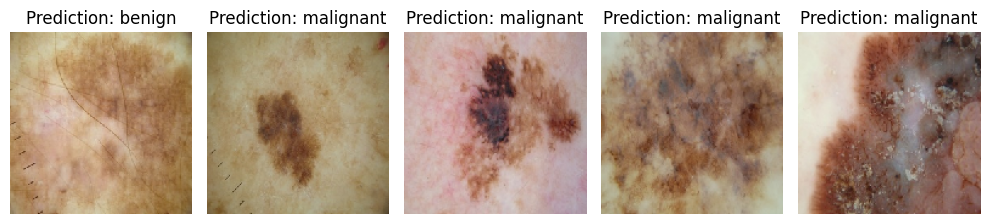

In [24]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()


plt.figure(figsize=(10, 5))

for i, fn in enumerate(uploaded.keys()):

    img = image.load_img(fn, target_size=(150, 150
    ))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0


    pred = model.predict(img_array)[0][0]
    label = "malignant" if pred > 0.5 else "benign"


    plt.subplot(1, len(uploaded), i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}")

plt.tight_layout()
plt.show()